In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]

---------------------------------
Python interpreter: /home/imarevic/Documents/teaching/SRH/content/statistik/statistik-env/bin/python3


# Das Positionsmaß

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

Ein Positionsmaß bestimmt die Position eines einzelnen Wertes im Verhältnis zu anderen Werten in einer Stichprobe oder einem Populationsdatensatz. Anders als der Mittelwert und die Standardabweichung sind auf **Quantilen** basierende deskriptive Maße nicht empfindlich gegenüber dem Einfluss einiger weniger extremer Beobachtungen. Aus diesem Grund werden deskriptive Maße, die auf Quantilen basieren, häufig denjenigen vorgezogen, die auf dem Mittelwert und der Standardabweichung basieren ({cite:t}`fahrmeirstatistik` s.60).

Quantile sind Punkte, die den Bereich der Daten in zusammenhängende Intervalle mit gleichen Wahrscheinlichkeiten unterteilen. Bestimmte <a href="https://de.wikipedia.org/wiki/Quantil_(Wahrscheinlichkeitstheorie)">Quantile</a> sind besonders wichtig: Der **Median** eines Datensatzes unterteilt die Daten in zwei gleiche Teile: die unteren $50 \%$ und die oberen $50 \%$. **Quartile** unterteilen die Daten in vier gleiche Teile und **Perzentile** unterteilen sie in Hundertstel oder $100$ gleiche Teile. Beachten Sie, dass der Median auch das $50$-te Perzentil ist. **Dezile** unterteilen einen Datensatz in Zehntel ($10$ gleiche Teile), und die **Quintile** unterteilen einen Datensatz in Fünftel ($5$ gleiche Teile). Es gibt immer ein Quantil weniger als die Anzahl der gebildeten Gruppen (z. B. gibt es **3** Quartile, die die Daten in **4** gleiche Teile unterteilen!).

## Quartile und Interquartilsbereich

**Quartile** unterteilen einen geordneten Datensatz in **vier gleiche Teile**. Diese drei Maße werden als **erstes Quartil** $(Q1)$, **zweites Quartil** $(Q2)$ und **drittes Quartil** $(Q3)$ bezeichnet. Das zweite Quartil ist dasselbe wie der Median eines Datensatzes. Das erste Quartil ist der Wert des mittleren Terms unter den Beobachtungen, die kleiner als der Median sind, und das dritte Quartil ist der Wert des mittleren Terms unter den Beobachtungen, die größer als der Median sind ({cite:t}`fahrmeirstatistik` s.59).

![Alt-Text](_img/median.png)

Ungefähr $25 \%$ der Werte in einem geordneten Datensatz sind kleiner als $Q1$ und etwa $75 \%$ sind größer als $Q1$. Das zweite Quartil, $Q2$, unterteilt einen geordneten Datensatz in zwei gleiche Teile; daher sind das zweite Quartil und der Median identisch. Etwa $75 \%$ der Datenwerte sind kleiner als $Q3$ und etwa $25 \%$ sind größer als $Q3$. Die Differenz zwischen dem dritten Quartil und dem ersten Quartil eines Datensatzes wird als **Interquartilsbereich** ($IQR$) bezeichnet ({cite:t}`fahrmeirstatistik` s.61).

$$ IQR=Q3−Q1 $$

Wechseln wir zu Python und testen wir seine Funktionalität zur Berechnung von Quantilen/Quartilen. Wir werden die `nc_score`-Variable des `students` Datensatzes verwenden, um Quartile und den $IQR$ zu berechnen. Die `nc_score`-Variable entspricht der <a href="https://de.wikipedia.org/wiki/Numerus_clausus">Numerus-Clausus</a>-Punktzahl jedes Studenten.

Zunächst werden die Daten unterteilt und ein Histogramm erstellt, um die Verteilung der Variablen genauer zu untersuchen.

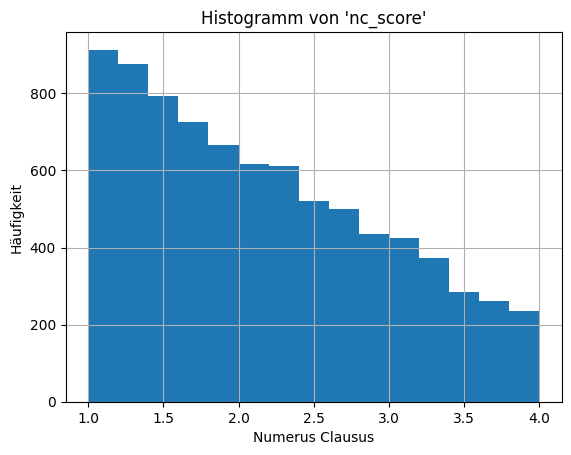

In [3]:
# Lese Daten ein
df = pd.read_csv("../../data/students.csv")

# Histogramm
df["nc_score"].hist(bins=15)
plt.xlabel("Numerus Clausus")
plt.ylabel("Häufigkeit")
plt.title("Histogramm von 'nc_score'")
plt.show()

Um die Quartile für die Variable nc_score zu berechnen, wenden wir die Funktion `np.quantile` an. Um die Quartile für die Variable `nc_score` zu berechnen, schreiben wir also einfach:

In [4]:
for e, q in enumerate([0.25, 0.5, 0.75, 1]):
    print(f"{e+1}. Quantil des nc_score: {np.quantile(df['nc_score'], q)}")

1. Quantil des nc_score: 1.46
2. Quantil des nc_score: 2.04
3. Quantil des nc_score: 2.78
4. Quantil des nc_score: 4.0


**Hinweis:** Nicht alle Statistiker definieren Quartile auf genau dieselbe Weise. Eine ausführliche Diskussion der verschiedenen Methoden zur Berechnung von Quantilen finden Sie in dem Online-Artikel <a href="http://jse.amstat.org/v14n3/langford.html">"Quartiles in Elementary Statistics" von E. Langford (2006)</a>.

Um den $IQR$ für die Variable `nc_score` zu berechnen, schreiben wir entweder...

In [5]:
# Berechne Interquartil Abstand mit Funktion np.percentile()
q1, q3 = np.percentile(df["nc_score"], [25, 75])
iqr = q3 - q1
iqr

np.float64(1.3199999999999998)

...oder wir wenden die eingebaute Funktion `iqr` aus dem Modul `scipy.stats` an:

In [6]:
stats.iqr(df["nc_score"], rng=(25, 75))

np.float64(1.3199999999999998)

Wir können die Aufteilung der Variablen `nc_score` in Quartile visualisieren, indem wir ein Histogramm erstellen und ein paar zusätzliche Codezeilen hinzufügen.

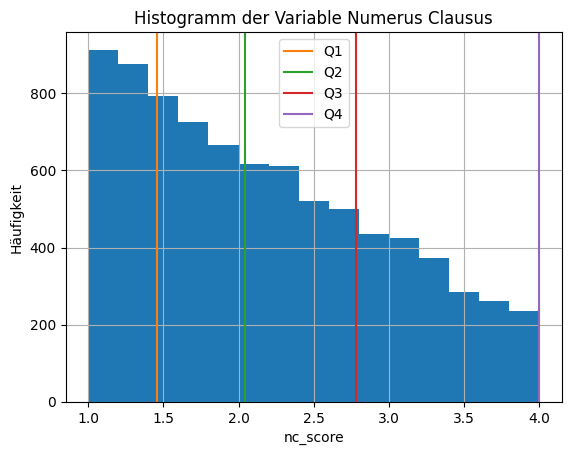

In [7]:
# Plotte die Liste als Histogramm mit Quartilen
df["nc_score"].hist(bins=15)
plt.xlabel("nc_score")
plt.ylabel("Häufigkeit")
plt.title("Histogramm der Variable Numerus Clausus")

# Zeichne vertikale Linien bei Q1, Q2, Q3, Q4
for e, q in enumerate([0.25, 0.5, 0.75, 1]):
    plt.axvline(x=np.quantile(df["nc_score"], q), color=f"C{e+1}", label=f"Q{e+1}")
plt.legend()

## Die 5-Punkte-Zusammenfassung

Aus den drei Quartilen $(Q1, Q2, Q3)$können wir ein Maß für die Lage der Mitte (den Median, $Q2$) und ein Maß für die Variation der beiden mittleren Quartale der Daten, $Q2-Q1$ für die zweiten Quartile und $Q3-Q2$ für die dritten Quartile ableiten. Die drei Quartile sagen jedoch nichts über die Variation der ersten und vierten Quartile aus.

Um diese Informationen zu erhalten, beziehen wir auch die Beobachtungen des Minimums und des Maximums mit ein. Die Variation der ersten Quartile kann als Differenz zwischen dem Minimum und der ersten Quartile, $Q1-Min$, gemessen werden, und die Variation der vierten Quartile kann als Differenz zwischen der dritten Quartile und dem Maximum, $Max-Q3$, gemessen werden. Somit liefern das Minimum, das Maximum und die Quartile zusammen unter anderem Informationen über Zentrum und Variation ({cite:t}`fahrmeirstatistik` s.62).

Die so genannte **Tukey-Fünf-Punkte-Zusammenfassung** (nach dem Mathematiker <a href="https://de.wikipedia.org/wiki/John_W._Tukey">John Wilder Tukey</a>) eines Datensatzes besteht aus den Werten $Min, Q1, Q2, Q3$ und $Max$ des Datensatzes.

Die Fünf-Punkte-Zusammenfassung lässt sich in Python durch `np.percentile` und die `min()`, `max()` Funktionen berechnen. Zu Demonstrationszwecken berechnen wir die Fünf-Punkte-Zusammenfassung für die Variable `nc_score`

In [8]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
df = pd.read_csv("../../data/students.csv", index_col=0)

# Berechne Fünf-Zahlen-Zusammenfassung
scores = df["nc_score"]

# Berechne die Quartilen
q1, median, q3 = np.percentile(scores, [25, 50, 75])

# Berechne minimal/maximal Datenpunkte
data_min, data_max = min(scores), max(scores)

# Ausgabe der Daten
print(f"Min:    {data_min}")
print(f"Q1:     {q1}")
print(f"Median: {median}")
print(f"Q3:     {q3}")
print(f"Max:    {data_max}")

Min:    1.0
Q1:     1.46
Median: 2.04
Q3:     2.78
Max:    4.0


Diese Funktion liefert Minimum, untere Quartile, Median, obere Quartile und Maximum für die Eingabedaten.

In Python gibt es eine ähnliche Methode namens `describe()`, die ähnliche Statistiken liefert.

In [9]:
df.describe()

,age,height,weight,nc_score,score1,score2,online_tutorial,graduated,salary
count,8239.000000,8239.000000,8239.000000,8239.000000,4892.000000,4892.000000,8239.000000,8239.000000,1753.000000
mean,22.541571,171.380750,72.998131,2.166481,68.164963,69.494685,0.386212,0.212769,42522.112253
std,6.065111,11.077529,8.635162,0.811548,14.051762,14.395251,0.486910,0.409290,10333.139992
min,18.000000,135.000000,51.400000,1.000000,30.000000,31.000000,0.000000,0.000000,11444.140000
25%,20.000000,163.000000,66.500000,1.460000,58.000000,59.000000,0.000000,0.000000,35206.540000
50%,21.000000,171.000000,71.800000,2.040000,70.000000,71.000000,0.000000,0.000000,41672.010000
75%,23.000000,180.000000,78.500000,2.780000,78.000000,80.000000,1.000000,0.000000,49372.540000
max,64.000000,206.000000,116.000000,4.000000,97.000000,98.000000,1.000000,1.000000,75596.790000


## Perzentile und Perzentilrang

**Perzentile** unterteilen einen geordneten Datensatz in $100$ gleiche Teile. Jeder (geordnete) Datensatz hat $99$ Perzentile, die ihn in $100$ gleiche Teile unterteilen. Das **k-te** Perzentil wird mit $P_k$ bezeichnet, wobei $k$ eine ganze Zahl im Bereich von $1$ bis $99$ ist. Das $25$-te Perzentil wird zum Beispiel mit $P_{25}$ bezeichnet.

So kann das **k-te** Perzentil, $P_k$, als ein Wert in einem Datensatz definiert werden, bei dem etwa $k\%$ der Messungen kleiner als der Wert von $P_k$ und etwa $(100-k)$ der Messungen größer als der Wert von $P_k$ sind

.

Der ungefähre Wert des **k-ten**.
Perzentils, bezeichnet mit $P_k$, ist 

$$ P_k = \frac{kn}{100} $$

wobei **k** die Nummer des Perzentils bezeichnet und **n** den Stichprobenumfang darstellt.

Als Übung berechnen wir das $38$-te, das $50$-te und das $73$-te Perzentil der Variablen `nc_score` in Python. Zunächst berechnen wir das 38. Perzentil gemäß der oben angegebenen Gleichung. Dann wenden wir die `np.percentile()`-Funktion von Python an, um das $38$-te, $50$-te und $73$-te Perzentil der Variablen `nc_score` zu ermitteln.

In [10]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
df = pd.read_csv("../../data/students.csv", index_col=0)

scores = df["nc_score"].sort_values()

# Berechne 38-te Perzentile
k = 38
n = len(scores)
print(f"Die {k}-te Perzentile ist {round((k*n)/100)}.")

Die 38-te Perzentile ist 3131.


In [11]:
scores

stud_id
427725    1.0
547711    1.0
174533    1.0
808854    1.0
340635    1.0
         ... 
575545    4.0
941727    4.0
619443    4.0
595839    4.0
547558    4.0
Name: nc_score, Length: 8239, dtype: float64

Wir wählen den Wert anhand dieser Zahl in der geordneten Liste `nc_score` aus und vergleichen ihn mit den Perzentilwerten.

In [12]:
scores.iloc[3131]

np.float64(1.74)

In [13]:
quartiles = np.percentile(scores, [38, 50, 73])
print(quartiles)

[1.74 2.04 2.71]


Das hat gut funktioniert! Sie können prüfen, ob der Median der Variablen `nc_score` dem $50$-te Perzentil $(2,04)$ entspricht, wie oben berechnet.

Wir können auch den **Perzentilrang** für einen bestimmten Wert $x_i$
eines Datensatzes mit der folgenden Gleichung berechnen: 

$$ \text{Perzentil Rang für} \   x_i = \frac{ \text{Werte kleiner als} \ x_i}{ \text{Gesamtanzahl der Werte im Datensatz}} $$

Der Perzentilrang von $x_i$ gibt den Prozentsatz der Werte im Datensatz an, die kleiner als $x_i$ sind.

In Python gibt es keine eingebaute Funktion zur Berechnung des Perzentilrangs. Es ist jedoch relativ einfach, eine solche Funktion selbst zu schreiben.

In [14]:
# Definiere Funktion my_percentile_rank
def my_percentile_rank(x, data: pd.Series):
    """Computes the percentile rank
    Args:
       x: int or float number
       data: Pandas Series
    """
    return sum(data < x) / len(data)

Jetzt berechnen wir zum Beispiel den Perzentilrang für einen Numerus clausus von $2,5$.

In [15]:
my_percentile_rank(2.5, scores)

0.6627017841971113

Wenn wir das Ergebnis auf den nächsten ganzzahligen Wert runden, können wir feststellen, dass etwa $66 \%$ der Studenten in unserem Datensatz einen Numerus clausus von mehr als $2,5$ hatten.

## Ausreißer und Boxplots

### Ausreißer
Bei der Datenanalyse ist die Identifizierung von Ausreißern und damit von Beobachtungen, die deutlich aus dem Gesamtmuster der Daten herausfallen, sehr wichtig. Ein Ausreißer erfordert besondere Aufmerksamkeit. Er kann das Ergebnis eines Mess- oder Aufzeichnungsfehlers, einer Beobachtung aus einer anderen Population oder einer ungewöhnlich extremen Beobachtung sein. Beachten Sie, dass eine extreme Beobachtung nicht zwangsläufig ein Ausreißer sein muss, sondern auch ein Hinweis auf eine Schieflage sein kann ({cite:t}`fahrmeirstatistik` s.62).

Wenn wir einen Ausreißer beobachten, sollten wir versuchen, seine Ursache zu ermitteln. Ist ein Ausreißer auf einen Mess- oder Aufzeichnungsfehler zurückzuführen oder gehört er aus einem anderen Grund eindeutig nicht zum Datensatz, kann er einfach entfernt werden. Wenn jedoch keine Erklärung für einen Ausreißer ersichtlich ist, ist die Entscheidung, ob er im Datensatz verbleiben soll, eine schwierige Ermessensentscheidung.

Als Diagnoseinstrument zum Aufspüren von Beobachtungen, die Ausreißer sein könnten, können wir Quartile und den **IQR** verwenden. Daher definieren wir die **Untergrenze** und die **Obergrenze** eines Datensatzes. Die untere Grenze ist die Zahl, die $1,5×IQRs$ unter dem ersten Quartil liegt; die obere Grenze ist die Zahl, die $1,5×IQRs$ über dem dritten Quartil liegt. Beobachtungen, die unterhalb der Untergrenze oder oberhalb der Obergrenze liegen, sind potenzielle Ausreißer ({cite:t}`fahrmeirstatistik` s.61).



$$\text{Untere Grenze}=Q1-1,5×IQR$$

$$\text{Obere Grenze}=Q3+1,5×IQR$$

### Boxplots

 Das Boxplot-Diagramm, auch **Box-and-Whisker-Diagramm** genannt, basiert auf der Fünf-Punkte-Zusammenfassung ({cite:t}`fahrmeirstatistik` s.62) und kann zur grafischen Darstellung von Zentrum und Variation eines Datensatzes verwendet werden. Diese Diagramme wurden von dem Mathematiker <a href="https://de.wikipedia.org/wiki/John_W._Tukey">John Wilder Tukey</a> erfunden. Es sind mehrere <a href="https://de.wikipedia.org/wiki/Box-Plot">Arten von Boxplots</a> gebräuchlich.

Box-and-Whisker-Diagramm bieten eine grafische Darstellung der Daten anhand von fünf Maßzahlen: dem Median, dem ersten Quartil, dem dritten Quartil sowie dem kleinsten und dem größten Wert des Datensatzes zwischen der unteren und der oberen Grenze. Der Abstand zwischen den verschiedenen Teilen des Kastens zeigt den Grad der Streuung und Schiefe der Daten an. Durch die Erstellung von Box-and-Whisker-Diagrammen können verschiedene Verteilungen miteinander verglichen werden. Es hilft auch, Ausreißer zu erkennen ({cite:t}`fahrmeirstatistik` s.62). Box-Plots können entweder horizontal oder vertikal gezeichnet werden.


![Alt-Text](_img/boxplot.png)
Die Ränder der Box sind immer das erste und dritte Quartil, und der Bereich innerhalb der Box ist immer das zweite Quartil (der Median). Die von den Boxen ausgehenden Linien (Whisker) zeigen die Variabilität außerhalb des oberen und unteren Quartils an. Um einen Boxplot zu erstellen, benötigen wir auch das Konzept der benachbarten Werte. Die **angrenzenden Werte** eines Datensatzes sind die extremsten Beobachtungen, die noch innerhalb der unteren und oberen Grenzen liegen; sie sind die extremsten Beobachtungen, die keine potenziellen Ausreißer sind. Ausreißer können als einzelne Punkte aufgetragen werden. Wenn es in einem Datensatz keine potenziellen Ausreißer gibt, sind die angrenzenden Werte lediglich das Minimum und das Maximum der Beobachtungen ({cite:t}`fahrmeirstatistik`).

Lassen Sie uns nun eine Reihe von Boxplots erstellen, um den Datensatz `students` eingehender zu analysieren. Wir beginnen mit der Erstellung eines Boxplots für die Variable `nc_score`.

In [16]:
# Lese der Datei students.csv; nur Spalten 'nc_score','semester','gender','height' werden verwendet
students = pd.read_csv(
    "../../data/students.csv", usecols=["nc_score", "semester", "gender", "height"]
)
students

,gender,height,nc_score,semester
0,Female,160,1.91,1st
1,Female,172,1.56,2nd
2,Female,168,1.24,3rd
3,Male,183,1.37,2nd
4,Female,175,1.46,1st
...,...,...,...,...
8234,Male,181,2.91,6th
8235,Male,178,2.03,2nd
8236,Female,169,3.72,3rd
8237,Male,195,2.74,4th


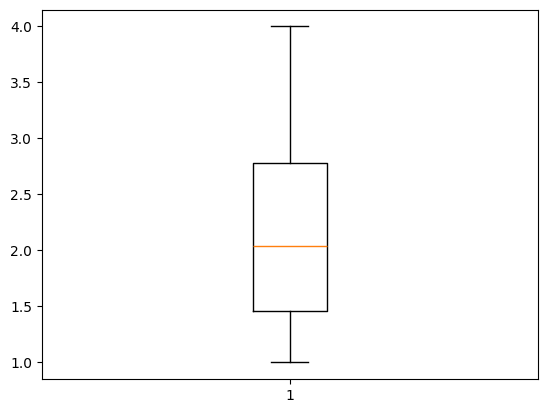

In [17]:
_ = plt.boxplot(students["nc_score"])

Wir erhalten sofort einen Eindruck von der Streuung und Schiefe der Daten. Durch Hinzufügen des Arguments `vert = False` zum Boxplot drehen wir den Boxplot um $90^∘$.


Text(0.5, 1.0, 'Numerus Clausus')

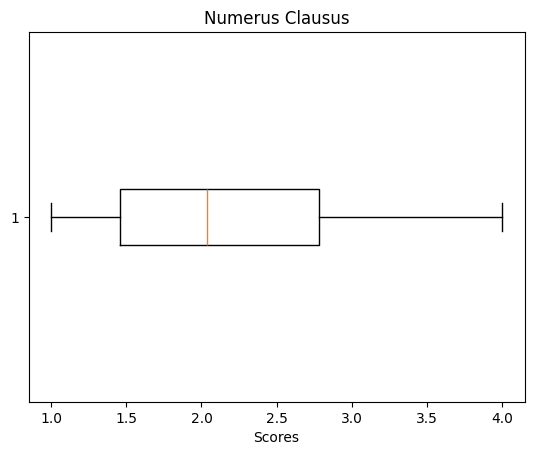

In [18]:
fig, ax = plt.subplots()
ax.boxplot(students["nc_score"], vert=False)
ax.set_xlabel("Scores")
ax.set_title("Numerus Clausus")

Boxplots sind eine sehr leistungsfähige Technik für die explorative Datenanalyse, da es sehr einfach ist, die Variable von Interesse, in unserem Fall die `nc_score`-Variable, auf andere Variablen zu beziehen und in ihrer Relation darstellen. In Python können wir das erreichen indem wir das Argument `by` in der `boxplot` Methode anwenden.  

Zeichnen wir einen Boxplot der Variable `nc_score` in Abhängigkeit von der Variable `semester`. Die `semester`-Variable entspricht dem Semester, in dem der jeweilige Student studiert. Zu Ihrer Information: Die Mindeststudienzeit für die untersuchten Studiengänge ist auf $4$ Semester festgelegt.

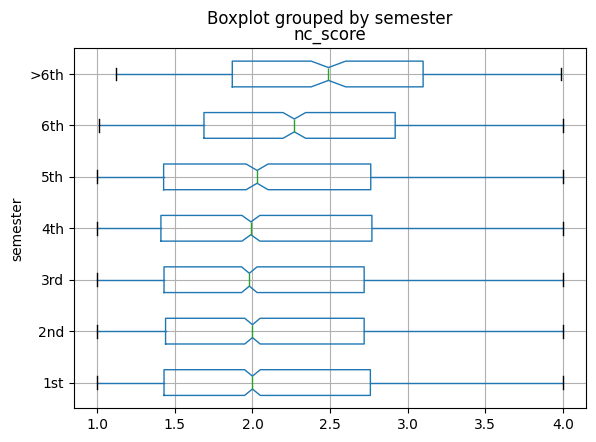

In [19]:
_ = students.boxplot(column="nc_score", by="semester", vert=False, notch=True)

Interessant, nicht wahr? Die Grafik zeigt, dass Studierende höherer Semester ($>5$-tes Semester) beim *Numerus clausus* tendenziell schlechter abschneiden. Mit anderen Worten: Studierende, die ihr Studium innerhalb der Mindeststudienzeit abschließen, haben tendenziell eine höhere *Numerus-clausus*-Punktzahl.

Doch damit sind wir noch nicht fertig. Wir wollen wissen, ob das Geschlecht einen Einfluss auf diese Beobachtung hat. Wir können ganz einfach eine Interaktionsvariable einfügen, indem wir die Variable nach den gruppiert werden soll in eckige Klammern setzen : `[var1, var2]`. Außerdem verwenden wir das Argument `notch` in der `boxplot` Methode. Wenn sich die notches zweier Diagramme nicht überschneiden, ist dies ein "starker Hinweis" dafür, dass sich die beiden Mediane unterscheiden [Chambers, et al. (1983): Graphical Methods for Data Analysis. Wadsworth & Brooks/Cole, S. 62)](https://www.worldcat.org/title/graphical-methods-for-data-analysis/oclc/1035370684). 

Bitte beachten Sie, dass wir eine zusätzliche Zeile Code schreiben müssen, um ein schöneres $y$-Label zu erhalten.

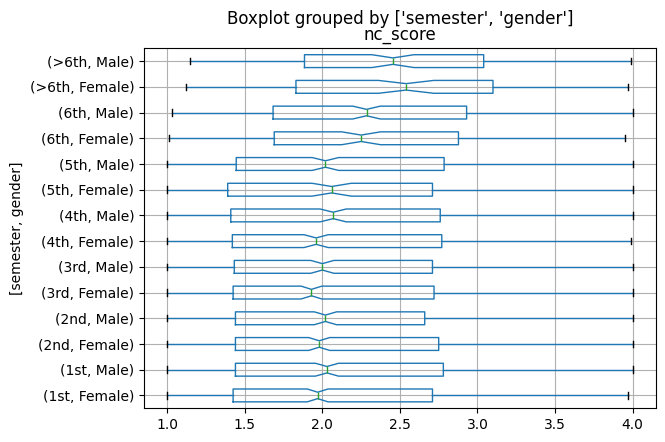

In [20]:
_ = students.boxplot(
    column="nc_score", by=["semester", "gender"], vert=False, notch=True
)

Dieses Diagramm ist nicht so einfach zu interpretieren. Es scheint jedoch, dass die oben gemachte Beobachtung bestätigt wird: Studierende aus höheren Semestern ($>5$-tes) schneiden beim *Numerus clausus* tendenziell schlechter ab. Der Einfluss des Geschlechts auf die *Numerus-Clausus*-Werte ist jedoch nicht so eindeutig. Wir werden Methoden der **Inferenzstatistik** anwenden müssen, um zu beurteilen, ob diese Unterschiede *statistisch signifikant* sind oder ob diese Schwankungen um den Median auch rein zufällig sein könnten.

Zum Abschluss dieses Abschnitts und um auch einen Boxplot mit Ausreißern zu sehen, stellen wir die Variable `height` gegen die Variable `gender` dar.

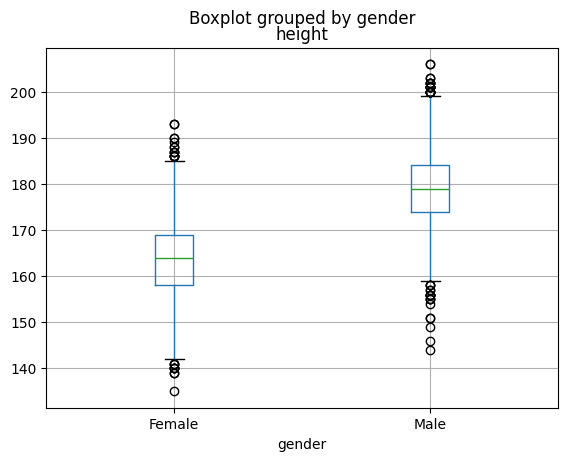

In [21]:
_ = students.boxplot(column="height", by="gender")

Offensichtlich, und sicherlich nicht unerwartet, gibt es einen Unterschied in der Größe der Studenten zwischen den verschiedenen Gruppen (männlich oder weiblich). Weibliche Studenten sind tendenziell kleiner als männliche, aber wenn wir uns die Extreme ansehen, gibt es in beiden Gruppen große und kleine Personen. Wie bereits erwähnt, müssen wir jedoch zunächst die Daten auf *statistische Signifikanz* prüfen, um sicher zu sein, dass der beobachtete Größenunterschied nicht nur zufällig ist.